In [1]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mp
import datetime as dt
import seaborn as sns
import numpy as np

### Connecting to Sqlite Database

In [2]:
#Vacation Range is 8/1/17 - 8/7/17

# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///../Resources/hawaii.sqlite", echo=False)

In [3]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [4]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [5]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurements', 'stations']

In [6]:
# Assign the measurement class to a variable called `Measurements`
Measurement = Base.classes.measurements

In [7]:
Station = Base.classes.stations

In [8]:
# Create a session
session = Session(engine)

In [9]:
# Get a list of column names and types
inspector = inspect(engine)
columns = inspector.get_columns('measurements')
for c in columns:
    print(c['name'], c["type"])
# columns below

id INTEGER
station VARCHAR
date VARCHAR
prcp FLOAT
tobs FLOAT


In [10]:
inspector = inspect(engine)
columns = inspector.get_columns('stations')
for c in columns:
    print(c['name'], c["type"])
# columns below

id INTEGER
station VARCHAR
name VARCHAR
latitude FLOAT
longitude FLOAT
elevation FLOAT


## Precipitation Analysis

In [11]:
#Designing a query to retrieve the last 12 months of precipitation data by retriving date and prcp columns - Date Range: 8/1/16 - 8/1/17
prcp_results= session.query(func.strftime("%Y-%m-%d",Measurement.date), func.sum(Measurement.prcp))\
            .filter(Measurement.date.between('2016-08-01','2017-07-31')).group_by(Measurement.date)\
            .order_by(Measurement.date).all()
prcp_results   

[('2016-08-01', 17.419999999999998),
 ('2016-08-02', 5.679999999999999),
 ('2016-08-03', 0.1),
 ('2016-08-04', 3.62),
 ('2016-08-05', 0.68),
 ('2016-08-06', 0.5),
 ('2016-08-07', 6.68),
 ('2016-08-08', 1.3200000000000003),
 ('2016-08-09', 1.1800000000000002),
 ('2016-08-10', 0.0),
 ('2016-08-11', 0.18000000000000002),
 ('2016-08-12', 1.1600000000000001),
 ('2016-08-13', 1.08),
 ('2016-08-14', 2.04),
 ('2016-08-15', 2.7),
 ('2016-08-16', 2.18),
 ('2016-08-17', 1.22),
 ('2016-08-18', 0.44),
 ('2016-08-19', 5.72),
 ('2016-08-20', 0.72),
 ('2016-08-21', 4.02),
 ('2016-08-22', 10.52),
 ('2016-08-23', 5.42),
 ('2016-08-24', 18.659999999999997),
 ('2016-08-25', 1.08),
 ('2016-08-26', 0.2),
 ('2016-08-27', 0.6399999999999999),
 ('2016-08-28', 6.199999999999999),
 ('2016-08-29', 2.92),
 ('2016-08-30', 0.14),
 ('2016-08-31', 6.359999999999999),
 ('2016-09-01', 0.060000000000000005),
 ('2016-09-02', 0.5),
 ('2016-09-03', 2.54),
 ('2016-09-04', 2.7600000000000002),
 ('2016-09-05', 0.67999999999999

In [12]:
dates = [i[0] for i in prcp_results]
precipitation = [(i[1]) for i in prcp_results]
print(dates[:5],'\n', precipitation[:5])

['2016-08-01', '2016-08-02', '2016-08-03', '2016-08-04', '2016-08-05'] 
 [17.419999999999998, 5.679999999999999, 0.1, 3.62, 0.68]


In [13]:
#PLace results into DataFrame
prcp_results_df = pd.DataFrame(prcp_results, columns=['date', 'precipitation'])

#Set Index to Date
prcp_results_df.set_index('date', inplace=True)
prcp_results_df.head()

,precipitation
date,
2016-08-01,17.42
2016-08-02,5.68
2016-08-03,0.10
2016-08-04,3.62
2016-08-05,0.68


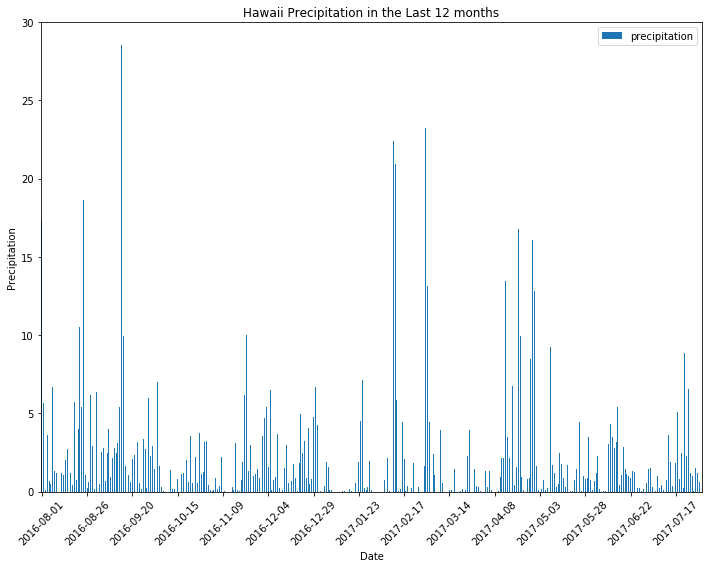

In [14]:
ax = prcp_results_df.plot(kind='bar', figsize=(10,8))
n = 25

xticks = ax.xaxis.get_ticklocs()
xticklabels = [tick.get_text() for tick in ax.xaxis.get_ticklabels()]
ax.set_xticks(xticks[::n])
ax.set_xticklabels(xticklabels[::n], rotation=45)
plt.title('Hawaii Precipitation in the Last 12 months')
plt.xlabel('Date')
plt.ylabel("Precipitation")
plt.tight_layout()                           
plt.show()


## Precipitation Analysis

In [15]:
prcp_results_df.describe()

,precipitation
count,365.000000
mean,2.124274
std,3.680526
min,0.000000
25%,0.120000
50%,0.860000
75%,2.420000
max,28.560000


## Station Analysis

In [16]:
#Query to calculate the total number of stations

total_stations = session.query(Station.station).distinct(Station.station).count()
print('Total number of stations is ' + str(total_stations))

Total number of stations is 9


In [17]:
#Query to Find the most active stations 
desc_order_active_stations = session.query(Measurement.station ,func.count(Measurement.station)).\
                    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
    
desc_order_active_stations

[('USC00519281', 5544),
 ('USC00519397', 5409),
 ('USC00513117', 5405),
 ('USC00519523', 5241),
 ('USC00516128', 5096),
 ('USC00514830', 4139),
 ('USC00511918', 3911),
 ('USC00517948', 2055),
 ('USC00518838', 853)]

In [18]:
#Station with Highest Number of Observations

most_active_stations = session.query(Measurement.station).\
                                     group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).limit(1).scalar()
print ("Station: " + str(most_active_stations), "has the highest number of observations")

Station: USC00519281 has the highest number of observations


In [19]:
#Query to Retrieve last 12months of temperature obversation data (tobs) - Date Range: 8/1/16 - 8/1/17

tobs_results = session.query(Measurement.station, Measurement.tobs).\
filter(Measurement.date.between('2016-08-01', '2017-07-31')).\
         order_by(Measurement.tobs.desc()).all()
tobs_results

[('USC00519397', 87.0),
 ('USC00519397', 87.0),
 ('USC00517948', 87.0),
 ('USC00519523', 84.0),
 ('USC00519523', 84.0),
 ('USC00519523', 84.0),
 ('USC00519523', 84.0),
 ('USC00519523', 84.0),
 ('USC00519523', 84.0),
 ('USC00519523', 84.0),
 ('USC00519523', 84.0),
 ('USC00519523', 84.0),
 ('USC00519523', 84.0),
 ('USC00519397', 83.0),
 ('USC00514830', 83.0),
 ('USC00514830', 83.0),
 ('USC00514830', 83.0),
 ('USC00519523', 83.0),
 ('USC00519523', 83.0),
 ('USC00519523', 83.0),
 ('USC00519523', 83.0),
 ('USC00519523', 83.0),
 ('USC00519397', 83.0),
 ('USC00514830', 83.0),
 ('USC00514830', 83.0),
 ('USC00514830', 83.0),
 ('USC00519523', 83.0),
 ('USC00519523', 83.0),
 ('USC00519523', 83.0),
 ('USC00519523', 83.0),
 ('USC00519523', 83.0),
 ('USC00519397', 82.0),
 ('USC00519397', 82.0),
 ('USC00513117', 82.0),
 ('USC00514830', 82.0),
 ('USC00514830', 82.0),
 ('USC00514830', 82.0),
 ('USC00514830', 82.0),
 ('USC00514830', 82.0),
 ('USC00514830', 82.0),
 ('USC00514830', 82.0),
 ('USC00514830',

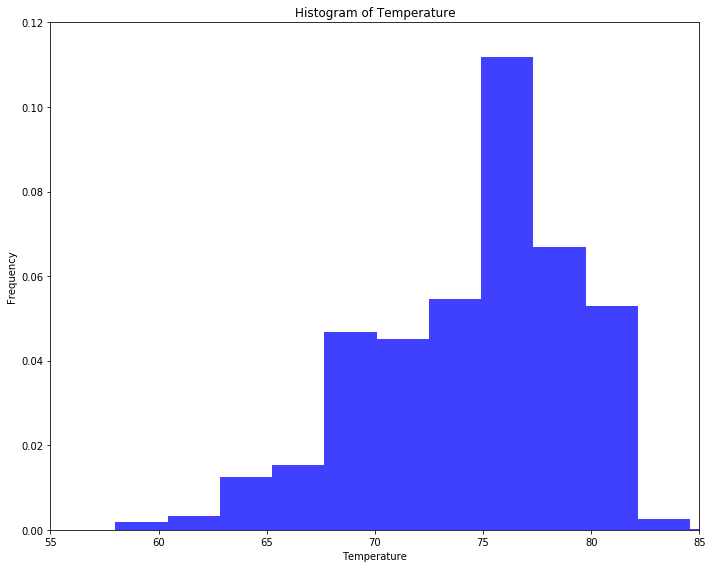

In [20]:
#most activelist to plot
active_station_temp = [result[1] for result in tobs_results[0:]]

#PLot Histogram of Temperature
fig, ax = plt.subplots(figsize=(10,8))
plt.hist(active_station_temp, bins = 12, align='mid', label="tobs", alpha=0.75, normed=1,color="b")
plt.xlabel('Temperature')
plt.ylabel("Frequency")
plt.axis([55, 85, 0, 0.12])
plt.title('Histogram of Temperature')
plt.tight_layout()
plt.show()


## Temperature Anaysis

In [21]:
Temp=[]
date1='2016-08-01'
date2='2017-08-01'
def calc_temps(date1, date2):
    results=session.query(func.max(Measurement.tobs).label("max_tobs"), \
                          func.min(Measurement.tobs).label("min_tobs"),\
                          func.avg(Measurement.tobs).label("avg_tobs")).\
                          filter(Measurement.date.between(date1 , date2))  
    res = results.one()
    TMax = res.max_tobs
    TMin = res.min_tobs
    TAvg = res.avg_tobs
    Temp.append(TMax)
    Temp.append(TMin)
    Temp.append(TAvg)
    
calc_temps(date1, date2)
Temp

TMax=Temp[0]
TMin=Temp[1]
TAvg=Temp[2]

C:\Users\tonia\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


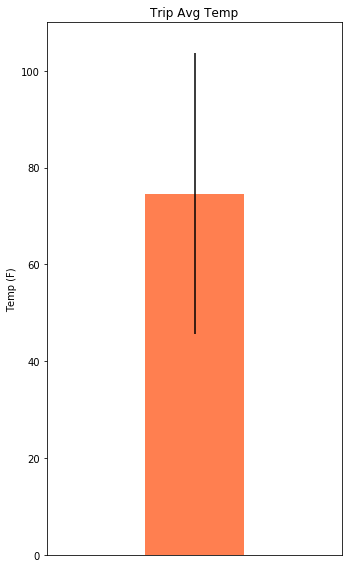

In [22]:
#Plot Trip Averge Temp

fig = plt.figure(figsize=(5,8))
plt.bar(1,TAvg, color ='coral', yerr = TMax-TMin, align='center')
plt.xlim(-0.2, 2.2)
plt.ylim([0, 110])
plt.axes().get_xaxis().set_visible(False)
plt.title('Trip Avg Temp')
plt.ylabel("Temp (F)")
plt.tight_layout()
plt.show()

## Optional Recommended Analysis

In [23]:
#Calculate the rainfall
Rainfall_results = session.query((Measurement.station), func.sum(Measurement.prcp))\
            .filter(Measurement.date.between('2016-08-01','2017-07-31')).group_by(Measurement.station)\
            .order_by(Measurement.date).all()
Rainfall_results

[('USC00513117', 108.78000000000002),
 ('USC00514830', 68.27999999999999),
 ('USC00516128', 315.8200000000003),
 ('USC00517948', 9.539999999999997),
 ('USC00519281', 158.98000000000033),
 ('USC00519397', 34.36000000000003),
 ('USC00519523', 79.6)]